# KELOMPOK 4
1. Dewi Sonia Putrie (21102153)
2. Fadila Aura Isnaeni (21102160)
3. Feby Setyany Lestari (21102162)

1. Install dan Import Library

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


2. Load Data dan Preprocessing

In [2]:
# 1. Load Dataset
file_path = '/content/drug_consumption.data'
df = pd.read_csv(file_path, header=None)

df = pd.read_csv(filepath_or_buffer=file_path, index_col=['ID'])
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 1 to 1888
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1885 non-null   float64
 1   Gender     1885 non-null   float64
 2   Education  1885 non-null   float64
 3   Country    1885 non-null   float64
 4   Ethnicity  1885 non-null   float64
 5   Nscore     1885 non-null   float64
 6   Escore     1885 non-null   float64
 7   Oscore     1885 non-null   float64
 8   Ascore     1885 non-null   float64
 9   Cscore     1885 non-null   float64
 10  Impulsive  1885 non-null   float64
 11  SS         1885 non-null   float64
 12  Alcohol    1885 non-null   object 
 13  Amphet     1885 non-null   object 
 14  Amyl       1885 non-null   object 
 15  Benzos     1885 non-null   object 
 16  Caff       1885 non-null   object 
 17  Cannabis   1885 non-null   object 
 18  Choc       1885 non-null   object 
 19  Coke       1885 non-null   object 

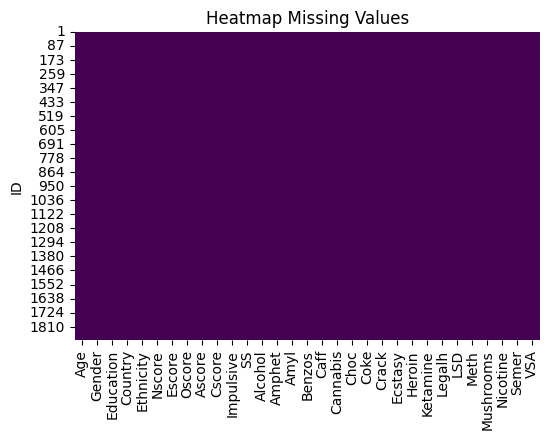

In [3]:
# 2. Eksplorasi Data
print("Informasi Dataset:")
print(df.info())

print("\nStatistik Deskriptif:")
print(df.describe())

print("\nCek Missing Values:")
print(df.isnull().sum())

# Visualisasi awal (hanya jika kolom target sudah ada)
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap Missing Values")
plt.show()



In [4]:
# Import plotly.express
import plotly.express as px
# Visualisasi menggunakan Plotly Express
float_columns = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

# Visualisasi menggunakan Plotly Express
float_columns = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

for column in float_columns:
    # Use px instead of express
    px.histogram(data_frame=df, x=column).show()

In [5]:
!pip install arrow
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


In [6]:
from arrow import now
from umap import UMAP
import plotly.express as px # Import plotly.express as px

targets = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']

time_start = now()
umap = UMAP(random_state=2024, verbose=True, n_jobs=1, low_memory=False, n_epochs=1000)
df[['x', 'y']] = umap.fit_transform(X=df[float_columns])
px.scatter(data_frame=df, x='x', y='y').show() # Use px instead of express
print('done with UMAP in {}'.format(now() - time_start))

UMAP(low_memory=False, n_epochs=1000, n_jobs=1, random_state=2024, verbose=True)
Wed Dec 18 17:02:15 2024 Construct fuzzy simplicial set
Wed Dec 18 17:02:17 2024 Finding Nearest Neighbors
Wed Dec 18 17:02:22 2024 Finished Nearest Neighbor Search
Wed Dec 18 17:02:26 2024 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

	completed  0  /  1000 epochs
	completed  100  /  1000 epochs
	completed  200  /  1000 epochs
	completed  300  /  1000 epochs
	completed  400  /  1000 epochs
	completed  500  /  1000 epochs
	completed  600  /  1000 epochs
	completed  700  /  1000 epochs
	completed  800  /  1000 epochs
	completed  900  /  1000 epochs
Wed Dec 18 17:02:34 2024 Finished embedding


done with UMAP in 0:00:19.889372


In [7]:
import warnings

warnings.filterwarnings(action='ignore', category=FutureWarning)
# we have to take a sample for performance reasons; if we try to plot the whole dataset our plots crash
sample_df = df.sample(n=300, random_state=2024)
for target in targets:
    # Check if the target column is in the sample DataFrame
    if target in sample_df.columns:
        # Use px instead of express
        px.scatter(data_frame=sample_df, x='x', y='y', color=target).show()
    else:
        print(f"Target column '{target}' not found in sample DataFrame. Skipping plot.")

In [8]:
# Cek jumlah kolom dan beberapa baris pertama
print("Shape of Dataset:", df.shape)  # Jumlah baris dan kolom
print("\nFirst 5 rows of Dataset:")
print(df.head())

# Cek nama kolom
print("\nColumn Names:")
print(df.columns)


Shape of Dataset: (1885, 33)

First 5 rows of Dataset:
        Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
ID                                                                      
1   0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
2  -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
3   0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
4  -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
5   0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

     Oscore   Ascore   Cscore  ...  Ketamine  Legalh  LSD Meth Mushrooms  \
ID                             ...                                         
1  -0.58331 -0.91699 -0.00665  ...       CL0     CL0  CL0  CL0       CL0   
2   1.43533  0.76096 -0.14277  ...       CL2     CL0  CL2  CL3       CL0   
3  -0.84732 -1.62090 -1.01450  ...       CL0     CL0  CL0  CL0       CL1   
4  -0.01928  0.59042  0.58489  ...       CL2     CL0 

In [9]:
# Menetapkan target label berdasarkan pola konsumsi obat pada kolom ke-34 (kolom terakhir)
df['consumption_status'] = df['Cannabis'].apply(lambda x: 0 if x == 'CL0' else 1)

# Periksa apakah kolom consumption_status sudah dibuat
print("\nDataset dengan Kolom consumption_status:")
print(df.head())



Dataset dengan Kolom consumption_status:
        Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
ID                                                                      
1   0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
2  -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
3   0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
4  -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
5   0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

     Oscore   Ascore   Cscore  ...  Legalh  LSD Meth Mushrooms Nicotine Semer  \
ID                             ...                                              
1  -0.58331 -0.91699 -0.00665  ...     CL0  CL0  CL0       CL0      CL2   CL0   
2   1.43533  0.76096 -0.14277  ...     CL0  CL2  CL3       CL0      CL4   CL0   
3  -0.84732 -1.62090 -1.01450  ...     CL0  CL0  CL0       CL1      CL0   CL0   
4  -0.01928  0.59042  0.58489  ...     CL

In [10]:
print("\nKolom dalam Dataset:")
print(df.columns)



Kolom dalam Dataset:
Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA', 'x', 'y', 'consumption_status'],
      dtype='object')


In [11]:
# Mengubah kolom menjadi numerik, isi NaN dengan median
X = df.iloc[:, 1:13]
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(X.median(), inplace=True)

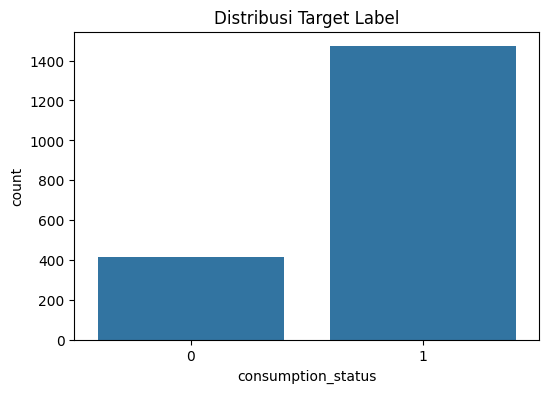

In [12]:
# PREPROCESSING
# Target label
df['consumption_status'] = df['consumption_status'].apply(lambda x: 1 if x == 1 else 0)

# Memilih kolom numerik sebagai fitur
X = df[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
        'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]

# Konversi ke numerik dan isi NaN
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.median())

# Target label
y = df['consumption_status']

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Visualisasi Distribusi Target
plt.figure(figsize=(6, 4))
sns.countplot(x='consumption_status', data=df)
plt.title('Distribusi Target Label')
plt.show()


3. Pembangunan Model Baseline (Random Forest Default)

In [13]:
# 4. Model Baseline - Random Forest
print("Training Baseline Random Forest Model...")
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluasi Random Forest
print("\nBaseline Random Forest Results:")
print(classification_report(y_test, rf_predictions))
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.2f}")

Training Baseline Random Forest Model...

Baseline Random Forest Results:
              precision    recall  f1-score   support

           0       0.70      0.38      0.49       123
           1       0.85      0.95      0.90       443

    accuracy                           0.83       566
   macro avg       0.77      0.67      0.70       566
weighted avg       0.82      0.83      0.81       566

Accuracy: 0.83


5. Eksplorasi Model (Hyperparameter Tuning)

In [14]:
# 5. Eksplorasi Model - Random Forest dengan Hyperparameter Tuning
print("\nEksplorasi Random Forest dengan Hyperparameter Tuning...")
rf_tuned = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf= 2, min_samples_split= 5, random_state=42)
rf_tuned.fit(X_train, y_train)
rf_tuned_predictions = rf_tuned.predict(X_test)

print("\nRandom Forest Tuned Results:")
print(classification_report(y_test, rf_tuned_predictions))
print(f"Accuracy: {accuracy_score(y_test, rf_tuned_predictions):.2f}")


Eksplorasi Random Forest dengan Hyperparameter Tuning...

Random Forest Tuned Results:
              precision    recall  f1-score   support

           0       0.75      0.40      0.52       123
           1       0.85      0.96      0.90       443

    accuracy                           0.84       566
   macro avg       0.80      0.68      0.71       566
weighted avg       0.83      0.84      0.82       566

Accuracy: 0.84


5. Eksplorasi Model (Model Alternatif dengan AdaBoost dan XGBoost)

In [15]:
# Membuat dan melatih model AdaBoost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=200, random_state=42)
ada_boost.fit(X_train, y_train)

# Prediksi dan evaluasi model AdaBoost
y_pred_ada = ada_boost.predict(X_test)

# Evaluasi performa model AdaBoost
print("AdaBoost Performance")
print(classification_report(y_test, y_pred_ada))
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.2f}")

AdaBoost Performance
              precision    recall  f1-score   support

           0       0.60      0.45      0.51       123
           1       0.86      0.92      0.89       443

    accuracy                           0.82       566
   macro avg       0.73      0.68      0.70       566
weighted avg       0.80      0.82      0.81       566

Accuracy: 0.82


In [16]:
# 6. Model Eksplorasi - XGBoost
print("\nTraining XGBoost Model...")
xgb_model = XGBClassifier(n_estimators=50, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Evaluasi XGBoost
print("\nXGBoost Results:")
print(classification_report(y_test, xgb_predictions))
print(f"Accuracy: {accuracy_score(y_test, xgb_predictions):.2f}")


Training XGBoost Model...

XGBoost Results:
              precision    recall  f1-score   support

           0       0.61      0.41      0.50       123
           1       0.85      0.93      0.89       443

    accuracy                           0.82       566
   macro avg       0.73      0.67      0.69       566
weighted avg       0.80      0.82      0.80       566

Accuracy: 0.82


Feature Importance for Baseline Random Forest:


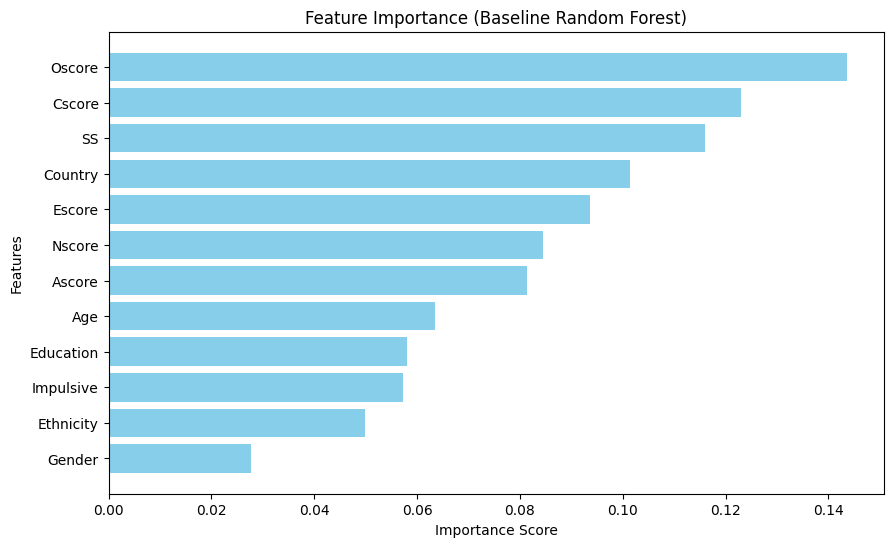

Feature Importance for Tuned Random Forest:


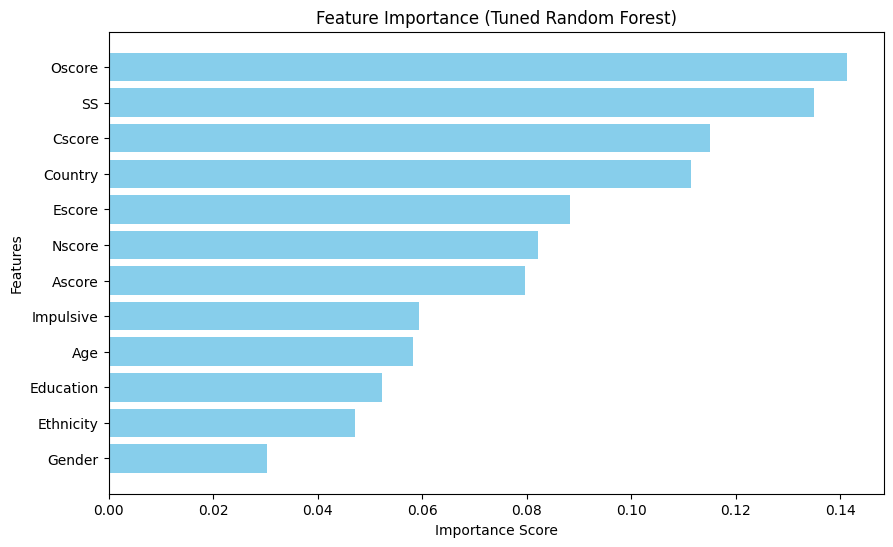

Feature Importance for AdaBoost:


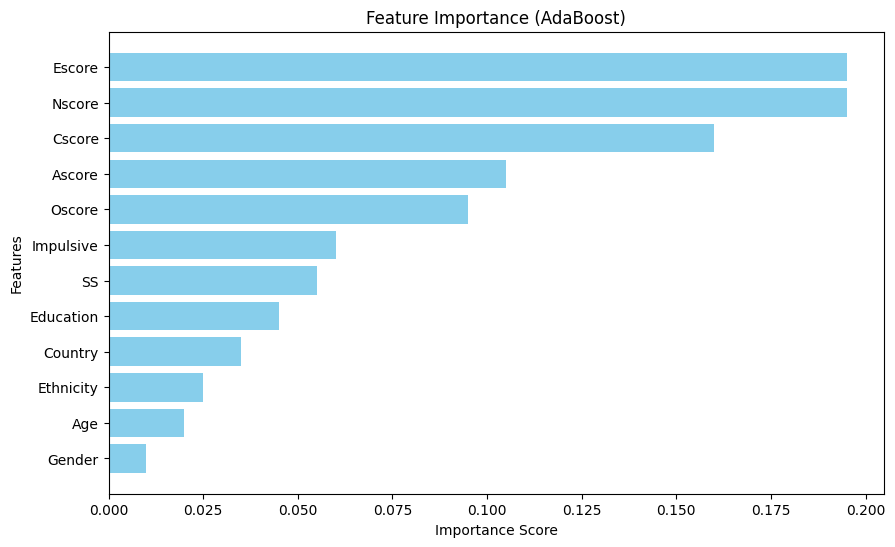

Feature Importance for XGBoost:


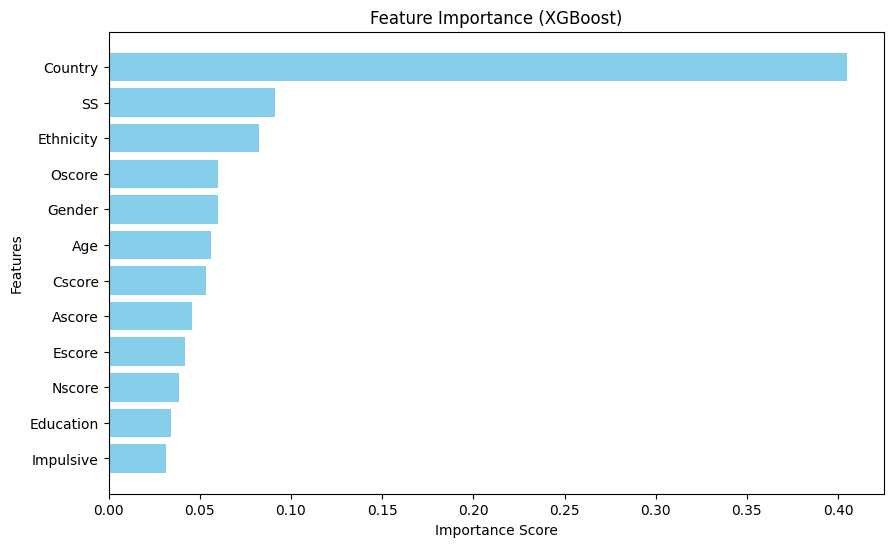

In [17]:
# Combine feature importance from all models
def plot_feature_importance(model, model_name, feature_names):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        sorted_idx = np.argsort(importance)[::-1]
        sorted_features = feature_names[sorted_idx]
        sorted_importance = importance[sorted_idx]

        plt.figure(figsize=(10, 6))
        plt.barh(sorted_features, sorted_importance, color="skyblue")
        plt.gca().invert_yaxis()
        plt.title(f"Feature Importance ({model_name})")
        plt.xlabel("Importance Score")
        plt.ylabel("Features")
        plt.show()
    else:
        print(f"{model_name} does not support feature importance directly.")

# Plot feature importance for all models
feature_names = X.columns

print("Feature Importance for Baseline Random Forest:")
plot_feature_importance(rf_model, "Baseline Random Forest", feature_names)

print("Feature Importance for Tuned Random Forest:")
plot_feature_importance(rf_tuned, "Tuned Random Forest", feature_names)

print("Feature Importance for AdaBoost:")
plot_feature_importance(ada_boost, "AdaBoost", feature_names)

print("Feature Importance for XGBoost:")
plot_feature_importance(xgb_model, "XGBoost", feature_names)


6. Evaluasi dan Visualisasi Model


Perbandingan Akurasi Model:
Baseline Random Forest Accuracy: 0.83
Tuned Random Forest Accuracy: 0.84
AdaBoost Accuracy: 0.82
XGBoost Accuracy: 0.82


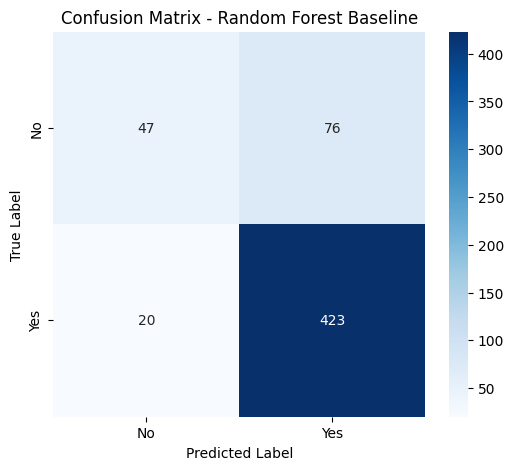

In [18]:
# 7. Visualisasi Perbandingan Hasil
print("\nPerbandingan Akurasi Model:")
print(f"Baseline Random Forest Accuracy: {accuracy_score(y_test, rf_predictions):.2f}")
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test, rf_tuned_predictions):.2f}")
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_ada):.2f}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_predictions):.2f}")

# Visualisasi Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Confusion Matrix for All Models
plot_confusion_matrix(y_test, rf_predictions, "Random Forest Baseline")

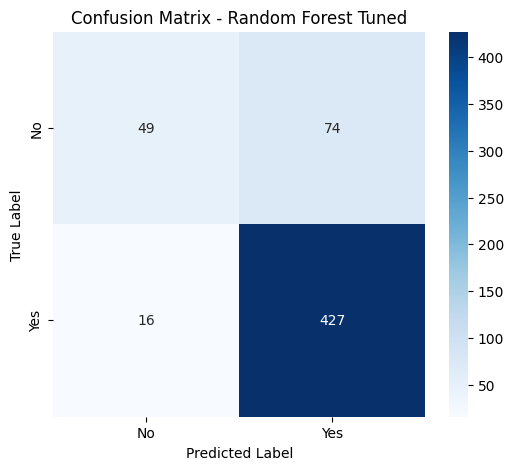

In [19]:
plot_confusion_matrix(y_test, rf_tuned_predictions, "Random Forest Tuned")

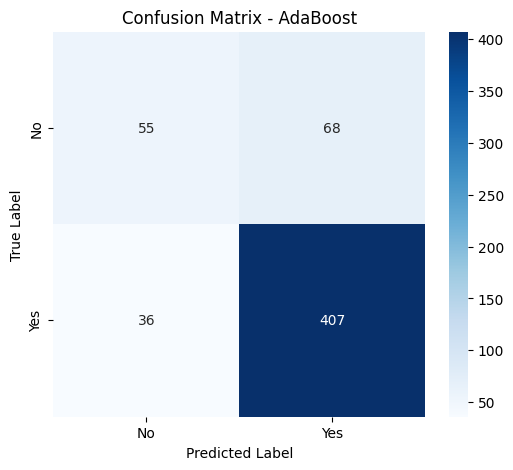

In [20]:
plot_confusion_matrix(y_test, y_pred_ada, "AdaBoost")

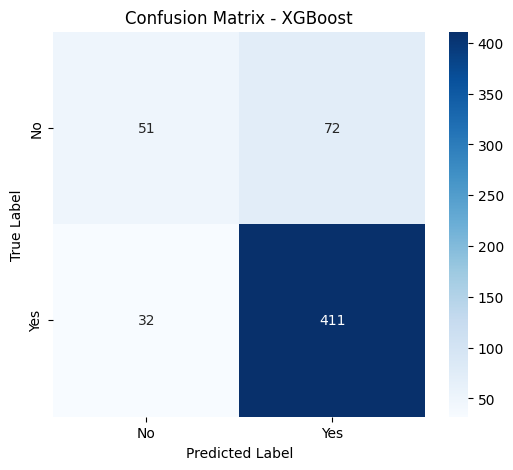

In [21]:
plot_confusion_matrix(y_test, xgb_predictions, "XGBoost")

<Figure size 800x600 with 0 Axes>

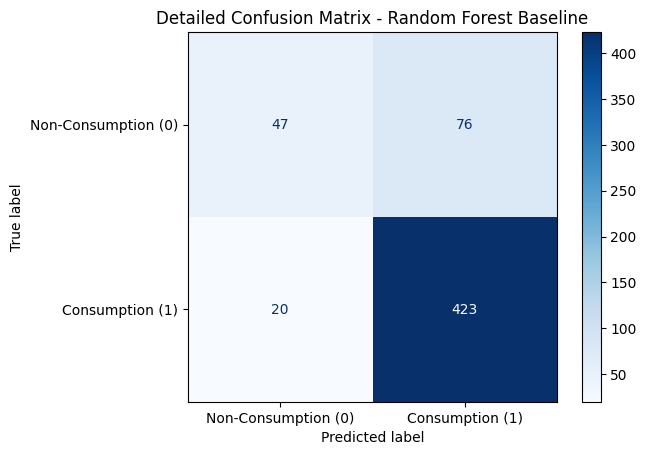

Accuracy for Random Forest Baseline: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.38      0.49       123
           1       0.85      0.95      0.90       443

    accuracy                           0.83       566
   macro avg       0.77      0.67      0.70       566
weighted avg       0.82      0.83      0.81       566



<Figure size 800x600 with 0 Axes>

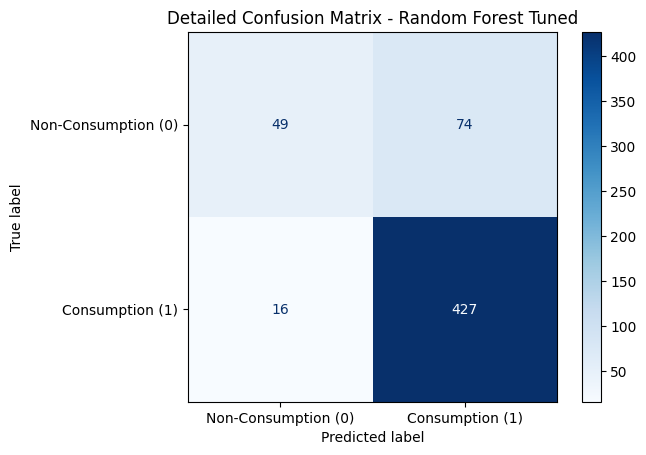

Accuracy for Random Forest Tuned: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.40      0.52       123
           1       0.85      0.96      0.90       443

    accuracy                           0.84       566
   macro avg       0.80      0.68      0.71       566
weighted avg       0.83      0.84      0.82       566



<Figure size 800x600 with 0 Axes>

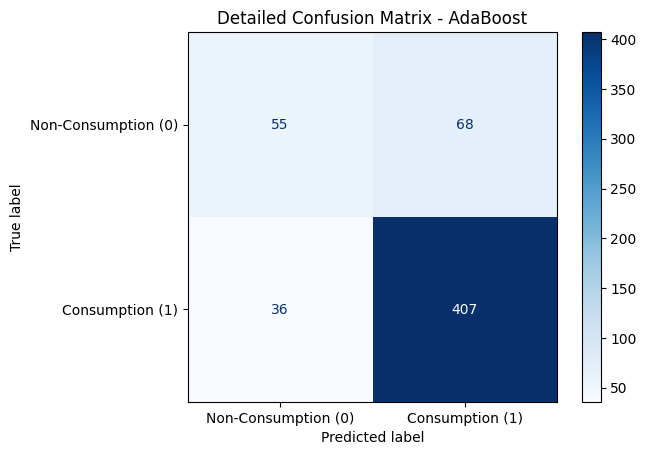

Accuracy for AdaBoost: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.45      0.51       123
           1       0.86      0.92      0.89       443

    accuracy                           0.82       566
   macro avg       0.73      0.68      0.70       566
weighted avg       0.80      0.82      0.81       566



<Figure size 800x600 with 0 Axes>

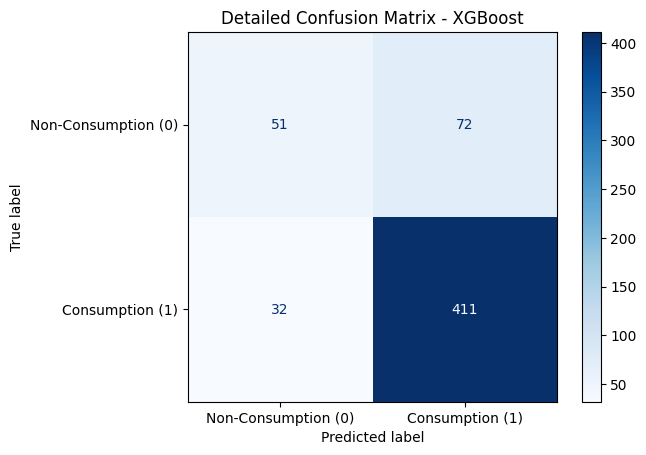

Accuracy for XGBoost: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.41      0.50       123
           1       0.85      0.93      0.89       443

    accuracy                           0.82       566
   macro avg       0.73      0.67      0.69       566
weighted avg       0.80      0.82      0.80       566



In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def detailed_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Consumption (0)", "Consumption (1)"])

    # Visualisasi
    plt.figure(figsize=(8, 6))
    cm_display.plot(cmap="Blues", values_format=".0f")  # Format float atau angka
    plt.title(f"Detailed Confusion Matrix - {model_name}")
    plt.show()

    # Menampilkan metrik tambahan
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

# Menampilkan Confusion Matrix dengan Detail
detailed_confusion_matrix(y_test, rf_predictions, "Random Forest Baseline")
detailed_confusion_matrix(y_test, rf_tuned_predictions, "Random Forest Tuned")
detailed_confusion_matrix(y_test, y_pred_ada, "AdaBoost")
detailed_confusion_matrix(y_test, xgb_predictions, "XGBoost")
